         DATE  Price_NZ    NZ_BTU  NZ_USD_Q  NZBTU_USD        HH
40 2009-03-01  6.739482  7.110531  0.538933   3.832102  3.993333
41 2009-06-01  7.067294  7.456390  0.626667   4.672671  3.670000
42 2009-09-01  6.931729  7.313362  0.705367   5.158602  3.380000
43 2009-12-01  6.880381  7.259187  0.724933   5.262427  4.946667
44 2010-03-01  7.198392  7.594707  0.704300   5.348952  4.546667
45 2010-06-01  6.402182  6.754661  0.701033   4.735242  4.523333
46 2010-09-01  7.423850  7.832577  0.730467   5.721436  3.880000
47 2010-12-01  7.609725  8.028686  0.762800   6.124282  4.150000
48 2011-03-01  7.300203  7.702123  0.763000   5.876720  4.100000
49 2011-06-01  7.201765  7.598266  0.818767   6.221207  4.423333
50 2011-09-01  7.321425  7.724513  0.813533   6.284149  3.843333
51 2011-12-01  6.270751  6.615994  0.781067   5.167532  3.026667
52 2012-03-01  6.584252  6.946755  0.824700   5.728989  2.210000
53 2012-06-01  6.787404  7.161091  0.784833   5.620263  2.613333
54 2012-09-01  6.727379  

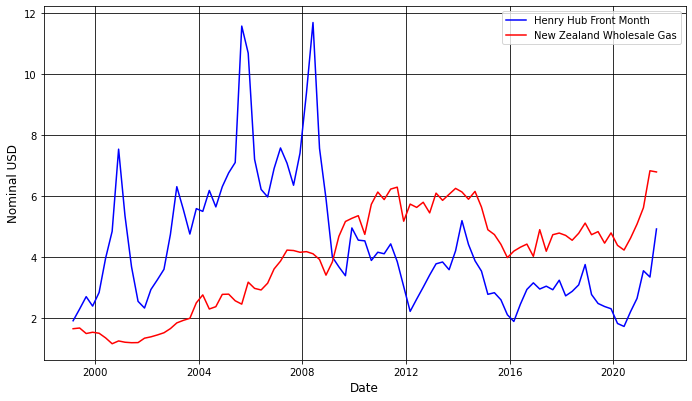

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df2 = df[(df['DATE'] >= '2009-3-1') & (df['DATE'] <= '2022-6-10')]
print(df2)

df3 = df[(df['DATE'] < '2009-3-1')]

fig = plt.gcf()
fig.set_size_inches(11.5, 6.5)
plt.plot(df['DATE'],df['HH'],color='blue')
plt.plot(df['DATE'],df['NZBTU_USD'],color='red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nominal USD', fontsize=12)
plt.legend(["Henry Hub Front Month", "New Zealand Wholesale Gas"], loc ="upper right")
plt.grid(color="black")

plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/}nz-us-gas.png', dpi=400)

                            OLS Regression Results                            
Dep. Variable:              NZBTU_USD   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.421
Date:                Fri, 18 Feb 2022   Prob (F-statistic):             0.0677
Time:                        13:14:36   Log-Likelihood:                -172.06
No. Observations:                  91   AIC:                             348.1
Df Residuals:                      89   BIC:                             353.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6082      0.390     11.825      0.0

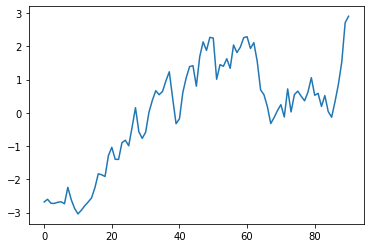

In [2]:
result1 = smf.ols(formula="NZBTU_USD ~ HH", data=df).fit()
print(result1.summary())
plt.plot(result1.resid)

In [3]:
test = ts.adfuller(result1.resid,autolag="AIC")
print(test)

result = ts.coint(df['HH'],df['NZBTU_USD'])
print(result)

(-1.1804161243782976, 0.6819629616552952, 0, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, 97.30690876431058)
(-3.4251278108594843, 0.03963520688630873, array([-4.02226691, -3.40486235, -3.09191025]))


(-2.221949320658508, 0.19837577799572548, 1, 49, {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}, 63.15312281185977)
(-1.9910868024613155, 0.2904948487735574, 5, 45, {'1%': -3.584828853223594, '5%': -2.9282991495198907, '10%': -2.6023438271604937}, 44.36227647231577)


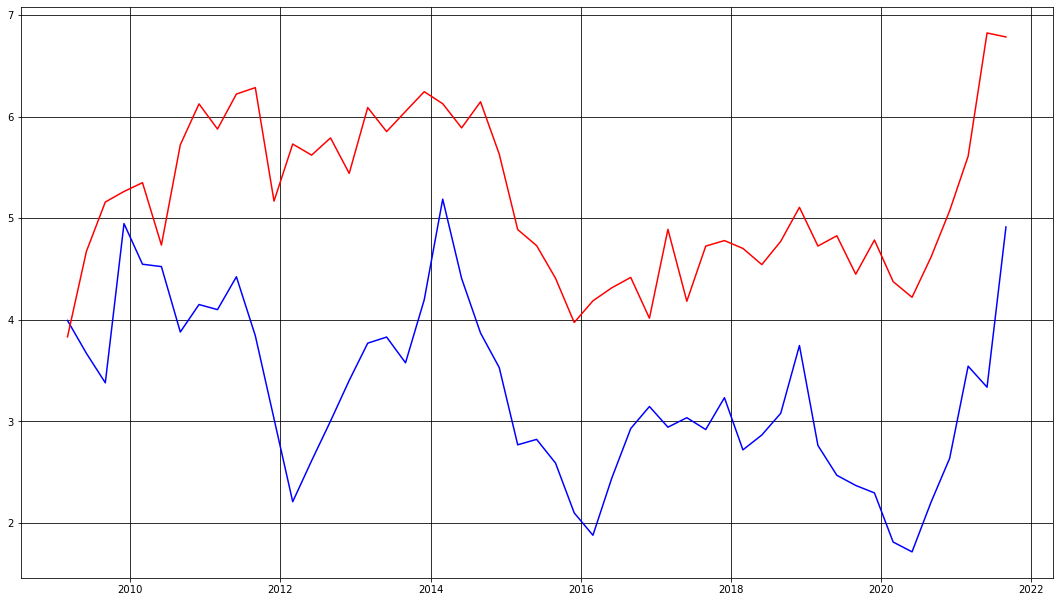

In [4]:
test1 = ts.adfuller(df2['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df2['NZBTU_USD'],autolag="AIC")
print(test2)




fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df2['DATE'],df2['HH'],color='blue')
plt.plot(df2['DATE'],df2['NZBTU_USD'],color='red')
plt.grid(color="black")

                            OLS Regression Results                            
Dep. Variable:              NZBTU_USD   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.96
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.50e-06
Time:                        13:14:36   Log-Likelihood:                -46.278
No. Observations:                  51   AIC:                             96.56
Df Residuals:                      49   BIC:                             100.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3526      0.344      9.752      0.0

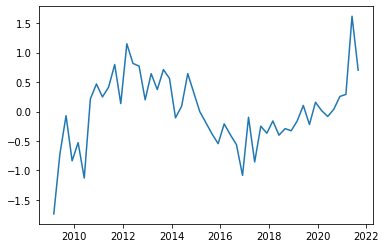

In [5]:
result2 = smf.ols(formula="NZBTU_USD ~ HH", data=df2).fit()
print(result2.summary())
plt.plot(df2["DATE"],result2.resid)




test = ts.adfuller(result2.resid,autolag="AIC")
print(test)

result = ts.coint(df2['HH'],df2['NZBTU_USD'])
print(result)

                            OLS Regression Results                            
Dep. Variable:                     HH   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.96
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.50e-06
Time:                        13:14:37   Log-Likelihood:                -51.567
No. Observations:                  51   AIC:                             107.1
Df Residuals:                      49   BIC:                             111.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2543      0.653     -0.389      0.6

AttributeError: 'tuple' object has no attribute 'resid'

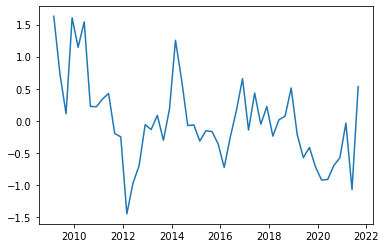

In [6]:
result_switch = smf.ols(formula="HH ~ NZBTU_USD", data=df2).fit()
print(result_switch.summary())
plt.plot(df2["DATE"],result_switch.resid)

test = ts.adfuller(result.resid,autolag="AIC")
print(test)

In [ ]:
test1 = ts.adfuller(df3['HH'],autolag="AIC")
print(test1)
test2 = ts.adfuller(df3['NZBTU_USD'],autolag="AIC")
print(test2)




fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df3['DATE'],df3['HH'],color='blue')
plt.plot(df3['DATE'],df3['NZBTU_USD'],color='red')
plt.grid(color="black")

In [ ]:
result3 = smf.ols(formula="NZBTU_USD ~ HH", data=df3).fit()
print(result3.summary())
plt.plot(df3["DATE"],result3.resid)



test = ts.adfuller(result3.resid,autolag="AIC")
print(test)

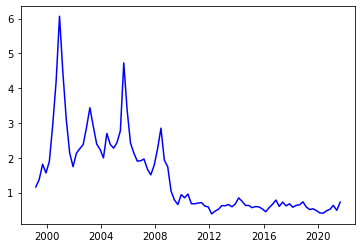

In [7]:
df['ratio'] = df["HH"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [8]:
mod = sm.tsa.MarkovRegression(df['ratio'].iloc[1:], k_regimes=2, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   90
Model:               MarkovRegression   Log Likelihood                  -1.323
Date:                Fri, 18 Feb 2022   AIC                             18.647
Time:                        13:14:48   BIC                             38.645
Sample:                             0   HQIC                            26.711
                                 - 90                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3329      0.048      6.902      0.000       0.238       0.427
x1             0.4599      0.071      6.470      0.000       0.321       0.599
sigma2         0.0097      0.002      5.013      0.000       0.006       0.014
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8106      0.310      2.616      0.009       0.203       1.418
x1             0.6823      0.115      5.954      0.000       0.458       0.907
sigma2         0.4800      0.109      4.423      0.000       0.267       0.693
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9892      0.013     76.600      0.000       0.964       1.015
p[1->0]        0.0122      0.015      0.801      0.423      -0.018       0.042
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [1]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price/volatility regime', figsize=(12,2))

NameError: name 'res_mod' is not defined

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10.5, 8)
plt.plot(df['DATE'],df['NZ_BTU'],color='green')
fig.suptitle('Quarterly New Zealand Natural Gas Prices',fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NZD/BTU', fontsize=12)
plt.grid(color="black")

plt.savefig('C:/Users/User/Dropbox/PhD/Writing/TeX/Charts/nzbtu.png', dpi=400)

In [10]:
star = Stargazer([result1,result2,result3])
print(star.render_latex())

NameError: name 'result3' is not defined